In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 返回缺失值个数以及最大最小值
data = pd.read_csv( 'air_data.csv' , encoding = 'utf-8') #读取原始数据，指定UTF-8编码。
data.shape

(62988, 44)

In [3]:
# 对数据的描述，探索性分析
explore = data.describe().T # T是转置，转置后更方便查阅。
explore

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


In [ ]:
# LAST_TO_END：最后一次乘机时间   —— R
# FLIGHT_COUNT：飞行次数  —— F
# SEG_KM_SUM：飞行总里程  —— M

In [4]:
data.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'EP_SUM_YR_1', 'EP_SUM_YR_2', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'WEIGHTED_SEG_KM', 'LAST_FLIGHT_DATE',
       'AVG_FLIGHT_COUNT', 'AVG_BP_SUM', 'BEGIN_TO_FIRST', 'LAST_TO_END',
       'AVG_INTERVAL', 'MAX_INTERVAL', 'ADD_POINTS_SUM_YR_1',
       'ADD_POINTS_SUM_YR_2', 'EXCHANGE_COUNT', 'avg_discount',
       'P1Y_Flight_Count', 'L1Y_Flight_Count', 'P1Y_BP_SUM', 'L1Y_BP_SUM',
       'EP_SUM', 'ADD_Point_SUM', 'Eli_Add_Point_Sum', 'L1Y_ELi_Add_Points',
       'Points_Sum', 'L1Y_Points_Sum', 'Ration_L1Y_Flight_Count',
       'Ration_P1Y_Flight_Count', 'Ration_P1Y_BPS', 'Ration_L1Y_BPS',
       'Point_NotFlight'],
      dtype='object')

In [8]:
df = data[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']]
df.head()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,1,210,580717
1,7,140,293678
2,11,135,283712
3,97,23,281336
4,5,152,309928


In [10]:
# 标准化标准差
data_sta = (df-df.mean(axis=0))/(df.std(axis=0))
data_sta.columns=['R','F','M']
data_sta.head()

,R,F,M
0,-0.952660,14.104488,26.887901
1,-0.920020,9.122093,13.193844
2,-0.898260,8.766208,12.718386
3,-0.430416,0.794378,12.605032
4,-0.930900,9.976218,13.969099


### 聚类

In [11]:
from sklearn.cluster import KMeans # 导入K均值聚类算法
def distEclud(vecA, vecB):
    """
    计算两个向量的欧式距离的平方，并返回
    """
    return np.sum(np.power(vecA - vecB, 2))
def test_Kmeans_nclusters(data_train):   # 手肘法
    """
    计算不同的k值时，SSE的大小变化
    """
    data_train = data_train.values
    nums = range(2, 10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=-1)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in range(len(data)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是", num, "时； SSE是", sse)
        SSE.append(sse)
    return nums, SSE
nums, SSE = test_Kmeans_nclusters(data_sta)

簇数是 2 时； SSE是 109920.40371046605
簇数是 3 时； SSE是 64225.63240115282
簇数是 4 时； SSE是 45376.39786649168
簇数是 5 时； SSE是 37182.627528711324
簇数是 6 时； SSE是 30614.002046637233
簇数是 7 时； SSE是 26854.769822298636
簇数是 8 时； SSE是 24399.0687827926
簇数是 9 时； SSE是 22154.052544258477


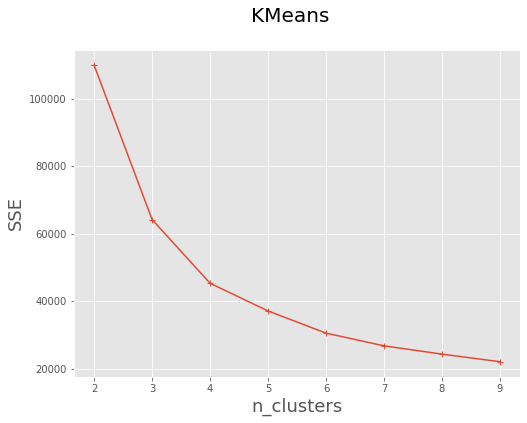

In [13]:
# 中文和负号的正常显示
# plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker="+")
ax.set_xlabel("n_clusters", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.show()

In [40]:
# 调用k-means算法，进行聚类分析
kmodel = KMeans(n_clusters = 3)
kmodel.fit(data_sta) #训练模型
print(kmodel.cluster_centers_) #查看聚类中心
print(kmodel.labels_ )#查看各样本对应的类别

[[-0.79254066  2.25008249  2.20541366]
 [ 1.50452342 -0.55908395 -0.52458863]
 [-0.45492302 -0.14795255 -0.15408757]]
[0 0 0 ... 2 1 1]


In [41]:
r1 = pd.Series(kmodel.labels_).value_counts() # 统计频数
r2 = pd.DataFrame(kmodel.cluster_centers_) # 聚类中心
r = pd.concat([r2,r1],axis=1)
r.columns = list(data_sta.columns) + ['聚类个数']
r

,R,F,M,聚类个数
0,-0.792541,2.250082,2.205414,6575
1,1.504523,-0.559084,-0.524589,15770
2,-0.454923,-0.147953,-0.154088,40643


### 雷达图

In [42]:
np.linspace(0,2*np.pi,3,endpoint=False)

array([0.       , 2.0943951, 4.1887902])

In [43]:
for i, v in enumerate(r.values):
    print(i,v)

0 [-7.92540663e-01  2.25008249e+00  2.20541366e+00  6.57500000e+03]
1 [ 1.50452342e+00 -5.59083948e-01 -5.24588627e-01  1.57700000e+04]
2 [-4.54923025e-01 -1.47952549e-01 -1.54087572e-01  4.06430000e+04]


In [44]:
np.concatenate((v[:-1], [v[0]]))

array([-0.45492302, -0.14795255, -0.15408757, -0.45492302])

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/ba

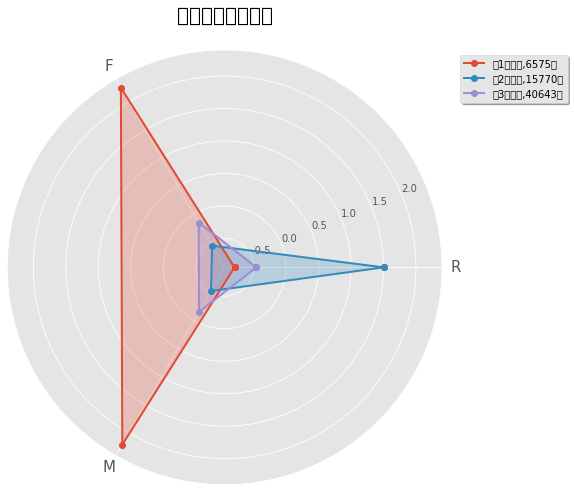

In [45]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,polar=True)  # 创建雷达图的画布

for i, v in enumerate(r.values):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles = np.linspace(0, 2 * np.pi, 3, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1], [v[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label="第%d簇人群,%d人" % (i + 1, v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180 / np.pi, ['R','F','M'], fontsize=15)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), ncol=1, fancybox=True, shadow=True)
    # bbox 指定图例在轴的位置  ncol 设置图例分为n列展示 fancybox 控制是否应在构成图例背景的FancyBboxPatch周围启用圆边